In [7]:
using Plots
using Dierckx
using QuadGK

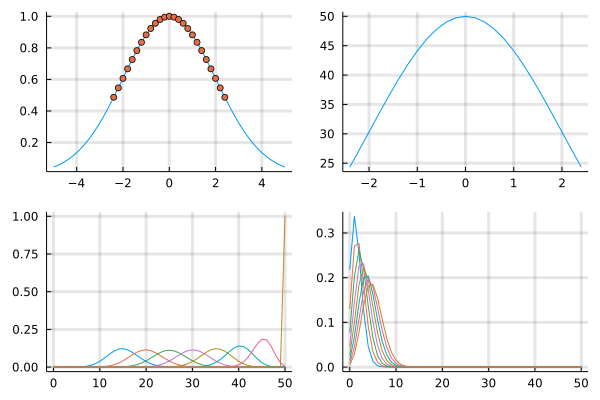

In [8]:
μ = 0.0
σ = 2.0
N = 50

gauss_rf(x; μ=μ, σ=σ) = exp( -(x-μ)^2 / (2σ^2) )

normal(x; μ=μ, σ=σ) = 1/(σ * sqrt(2π)) * exp( -(x-μ)^2 / (2σ^2) )

binom_pdf(k, p, N=N) = binomial(BigInt(N), BigInt(k)) * p^k * (1-p)^(N-k)
binom_ev(p , N=N) = N*p

xrange = range(-5.0, stop=5.0, step=0.1)
srange = range(-2.4, stop=2.4, step=0.2)
s      = gauss_rf.(srange)

p1 = plot(xrange, gauss_rf.(xrange))
plot!(p1, srange, s, seriestype=:scatter, legend=:false)

p2 = plot(srange, binom_ev.(s),legend=:false)

krange = range(0,N,step=1)
prange = range(0.3,1.0,step=0.1)
p3 = plot(krange, [[binom_pdf(k, p, N) for k in krange] for p in prange], legend=:false)

krange = range(0,N,step=1)
prange2 = range(0.03,0.1,step=0.01)
p4 = plot(krange, [[binom_pdf(k, p, N) for k in krange] for p in prange2], legend=:false)

plot(p1, p2, p3, p4, grid=(1,3))

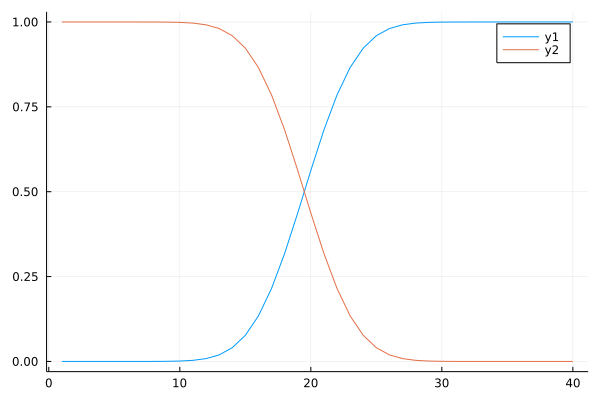

In [14]:
binom_cdf(k, N=N, p=p) = sum(binom_pdf(_k,p,N) for _k in 1:k)
plateau_response(θ, p=p, N=N) = 1 - sum(binom_pdf(k, p, N) for k in 0:θ)

plot(1:N, binom_cdf.(1:N))
plot!(1:N, plateau_response.(1:N))


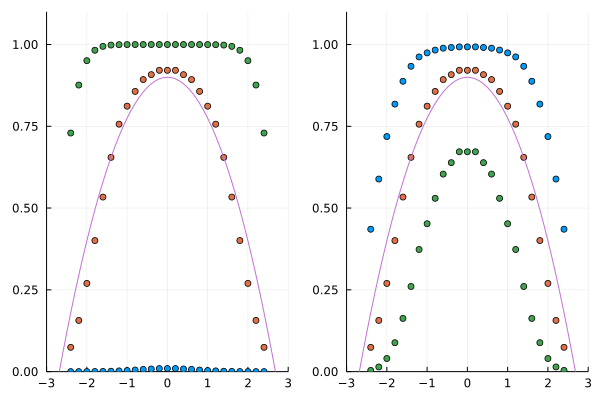

In [9]:
plateau_response(θ, p, N) = 1 - sum(binom_pdf(k, p, N) for k in 0:θ)

repeated_volley(repetitions, θ, p , N) = 1 - (binomial(N,0) * (1-plateau_response(θ,p,N))^N)

all_M = round.(Int,binom_ev.(s))


theta = [7,10,13]
p = [0.1,0.3, 0.5]

p2 = plot(srange, [[plateau_response(theta[2], _p, M) for M in all_M] for _p in p], seriestype=:scatter)
plot!(p2, xrange, log.(gauss_rf.(xrange)).+0.9, xlims=(-3,3), ylims=(0,1.1), legend=:false)

p3 = plot(srange, [[plateau_response(_theta, p[2], M) for M in all_M] for _theta in theta], seriestype=:scatter)
plot!(p3, xrange, log.(gauss_rf.(xrange)).+0.9, xlims=(-3,3), ylims=(0,1.1), legend=:false)


plot(p2, p3)

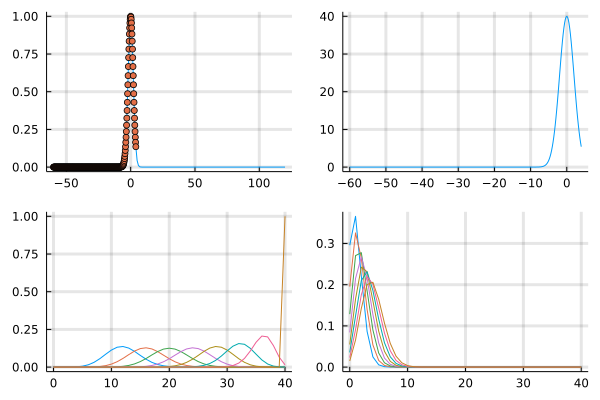

In [11]:
μ_1 = 30
μ_2 = 40
σ_1 = 20
σ_2 = 10

μ_3 = σ_2^2/(σ_1^2 + σ_2^2) * μ_1 + σ_1^2 / (σ_1^2 + σ_2^2) * μ_2
σ_3 = 1/σ_1^2 + 1/σ_2^2


rot_1(x) = gauss_rf(x; μ=μ_1, σ=σ_1)
rot_2(x) = gauss_rf(x; μ=μ_2, σ=σ_2)
rot_3(x) = gauss_rf(x; μ=μ_3, σ=σ_3)




xrange = range(-60, stop = 120, step=1)
plot(xrange, [rot_1.(xrange), rot_2.(xrange), rot_3.(xrange)])

srange = range(-60, stop=4.0, step=0.2)
s      = gauss_rf.(srange)

p1 = plot(xrange, gauss_rf.(xrange))
plot!(p1, srange, s, seriestype=:scatter, legend=:false)

p2 = plot(srange, binom_ev.(s),legend=:false)

krange = range(0,N,step=1)
prange = range(0.3,1.0,step=0.1)
p3 = plot(krange, [[binom_pdf(k, p, N) for k in krange] for p in prange], legend=:false)

krange = range(0,N,step=1)
prange2 = range(0.03,0.1,step=0.01)
p4 = plot(krange, [[binom_pdf(k, p, N) for k in krange] for p in prange2], legend=:false)

plot(p1, p2, p3, p4, grid=(1,3))

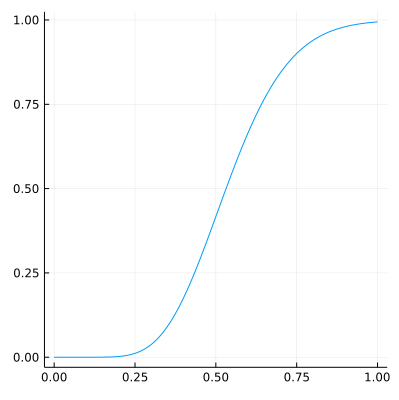

In [39]:
plateau(q,p,N,θ) = begin
    sum = 0.0
    for m in 0:θ
        for n in m:N
            sum += binomial(BigInt(N),BigInt(n)) * binomial(BigInt(n),BigInt(m)) * p^m * q^n * (1-p)^(n-m) * (1-q)^(N-n)
        end
    end
    return 1 - sum
end

qs = 0.0:0.01:1.0
rs = plateau.(qs, 0.2, 100, 10)

plot(qs, rs, size=(400,400), legend=:false)


In [82]:
qs = 0.0:0.01:1.0

T1 = plateau.(qs, 1.0, 100, 10)
T1_var = T1 .* (1 .- T1)
T2 = plateau.(qs, 1.0, 100, 30)
T2_var = T2 .* (1 .- T2)
T3 = plateau.(qs, 1.0, 100, 50)
T3_var = T3 .* (1 .- T3)
T4 = plateau.(qs, 1.0, 100, 70)
T4_var = T4 .* (1 .- T4)
T5 = plateau.(qs, 1.0, 100, 90)
T5_var = T5 .* (1 .- T5)

P1 = plateau.(qs, 0.1, 100, 10)
P1_var = P1 .* (1 .- P1)
P2 = plateau.(qs, 0.15, 100, 10)
P2_var = P2 .* (1 .- P2)
P3 = plateau.(qs, 0.2, 100, 10)
P3_var = P3 .* (1 .- P3)
P4 = plateau.(qs, 0.25, 100, 10)
P4_var = P4 .* (1 .- P4)
P5 = plateau.(qs, 0.3, 100, 10)
P5_var = P5 .* (1 .- P5)

TP1 = plateau.(qs, 0.05, 100, 2)
TP1_var = TP1 .* (1 .- TP1)
TP2 = plateau.(qs, 0.1, 100, 5)
TP2_var = TP2 .* (1 .- TP2)
TP3 = plateau.(qs, 0.15, 100, 8)
TP3_var = TP3 .* (1 .- TP3)
TP4 = plateau.(qs, 0.2, 100, 10)
TP4_var = TP4 .* (1 .- TP4)
TP5 = plateau.(qs, 0.25, 100, 13)
TP5_var = TP5 .* (1 .- TP5)
;

101-element Vector{BigFloat}:
 0.0
 8.878898061196697535032282358195252616264928335468684166135318651569737108809536e-16
 1.922864641979283308338604526536845472875303013986593108046157853301972470671809e-15
 4.578739036595411408091704376488533709047739262697376508765896154249092178097621e-14
 1.979106357602713213484102624236581963457192354426051686153882370565092083292066e-12
 3.671157351333101511153714876929587205366089050218245069436556039156318683930513e-11
 3.850221651733314862500530305482395228113835206208096022595082921553739204373626e-10
 2.72150702702082856896603833975455110239025622767468400753055507122336535781678e-09
 1.440982388934370284282981744147231118755126215832697242244992799950794724816773e-08
 6.118552656227912357492455654738953227277211062886933641011957384511105540516868e-08
 ⋮
 0.008794585735755069430995946988076361459982592203139249456801599360265907835155118
 0.007555697627366335995989375787428855715668778504980962196371504111966372372732758
 0.0064764216849551

In [98]:
qs_var = qs .* (1 .-qs)

p11 = plot(qs, qs, linestyle=:dash, linecolor=:black, linewidth=3, linealpha=0.8, size=(600,600), legend=:false)
plot!(qs, T1)
plot!(qs, T2)
plot!(qs, T3)
plot!(qs, T4)
plot!(qs, T5)

p12 = plot(qs, qs_var, linestyle=:dash, linecolor=:black, linewidth=3, linealpha=0.8, size=(600,600), legend=:false)
plot!(qs, T1_var)
plot!(qs, T2_var)
plot!(qs, T3_var)
plot!(qs, T4_var)
plot!(qs, T5_var)

p21 = plot(qs, qs, linestyle=:dash, linecolor=:black, linewidth=3, linealpha=0.8, size=(600,600), legend=:false)
plot!(qs, P1)
plot!(qs, P2)
plot!(qs, P3)
plot!(qs, P4)
plot!(qs, P5)

p22 = plot(qs, qs_var, linestyle=:dash, linecolor=:black, linewidth=3, linealpha=0.8, size=(600,600), legend=:false)
plot!(qs, P1_var)
plot!(qs, P2_var)
plot!(qs, P3_var)
plot!(qs, P4_var)
plot!(qs, P5_var)

p31 = plot(qs, qs, linestyle=:dash, linecolor=:black, linewidth=3, linealpha=0.8, size=(600,600), legend=:false)
plot!(qs, TP1)
plot!(qs, TP2)
plot!(qs, TP3)
plot!(qs, TP4)
plot!(qs, TP5)

p32 = plot(qs, qs_var, linestyle=:dash, linecolor=:black, linewidth=3, linealpha=0.8, size=(600,600), legend=:false)
plot!(qs, TP1_var)
plot!(qs, TP2_var)
plot!(qs, TP3_var)
plot!(qs, TP4_var)
plot!(qs, TP5_var)

fullplot = plot(p11,p21,p31,p12,p22,p32, layout=(2,3), size=(1800,1200))
savefig(fullplot, "figures/probabilistic.svg")

In [ ]:
function roc(M, N, N′, p, q)
    binom_pdf(k, N, p) = binomial(BigInt(N), BigInt(k)) * p^k * (1-p)^(N-k)


    pᵥ(k) = k > N ? 0 : binom_pdf(k, N, p)
    pₙ(k) = k > M-N ? 0 : binom_pdf(k, M-N, p*q)
    pₛ(s) = sum(pᵥ(k) * pₙ(s-k) for k = 0:s)
    Fₚ(θ) = sum(pₛ(s) for s = 0:θ)
    TP_detection_rate(θ) = 1 - Fₚ(θ-1)

    pᵥ′(k) = k > N′ ? 0 : binom_pdf(k, N′, p)
    pₙ′(k) = k > M-N′ ? 0 : binom_pdf(k, M-N′, p*q)
    pₛ′(s) = sum(pᵥ′(k) * pₙ′(s-k) for k = 0:s)
    Gₚ(θ) = sum(pₛ′(s) for s = 0:θ)
    FP_detection_rate(θ) = 1 - Gₚ(θ-1)

    x = [0, [FP_detection_rate(θ) for θ=1:M]..., 1]
    y = [0, [TP_detection_rate(θ) for θ=1:M]..., 1]
    return x, y
end

function auc(fp, tp)
    # interpolations only work if x,y pairs are sorted, nan free, unique
    sort_idx = sortperm(fp)
    x = convert(Array{Float64,1}, fp[sort_idx])
    y = convert(Array{Float64,1}, tp[sort_idx])

    # drop pair if nan in either dimension
    nan_free_x = findall(!isnan, x)
    x = x[nan_free_x]
    y = y[nan_free_x]

    nan_free_y = findall(!isnan, y)
    x = x[nan_free_y]
    y = y[nan_free_y]

    unique_idx = [findfirst(f -> f==el, x) for el in unique(x)]
    x = x[unique_idx]
    y = y[unique_idx]
       
    roc_curve = Spline1D(x, y)
    auc, _ = quadgk(roc_curve, 0.0, 1.0)
    
    return auc, roc_curve
end

function p_n(M, N, q, p_step)
    ps = range(p_step, stop=1.0, step=p_step)

    n = reverse([N-i for i = 0:N-1])

    aucs = zeros(Float64, length(ps), length(n))

    for (n_idx, N′) in enumerate(n)
        for (p_idx, p) in enumerate(ps)                        
            fp, tp = roc(M, N, N′, p, q)
            aucs[p_idx, n_idx], _ = auc(fp, tp)
        end
    end
    
    auc_diffs = hcat([aucs[:,k] .- aucs[length(ps),k] for k=1:length(ps)]...)
    
    return aucs, auc_diffs, ps, n
end

In [ ]:
q = 0.1
M = 100 # total synapses
N = 10 # volley magnitude

x_stoch, y_stoch = roc(M, 10, 4, 0.8, q)
x_determ, y_determ = roc(M, 10, 0, 1.0, q)

auc_stoch, roc_stoch = auc(x_stoch, y_stoch)
auc_determ, roc_determ = auc(x_determ, y_determ)

curve_x = 0:0.01:1.0

plot(x_stoch, y_stoch, label="stochastic channel", legend=:bottomright, linetype=:scatter, color=:orange, size=(800,800))
plot!(curve_x, roc_stoch.(curve_x), linetype=:line, color=:orange, label=:none)
plot!(x_determ, y_determ, label="deterministic channel", linetype=:scatter, color=:blue)
plot!(curve_x, roc_determ.(curve_x), linetype=:line, color=:blue, label=:none)

In [ ]:
aucs, auc_diffs,ps,n = p_n(M, N, q, 0.1)

In [ ]:
xs = reverse([N-i for i = 0:N])
ys = collect(range(0.1, stop=1.0, step=0.1))
heatmap(aucs)

In [ ]:
heatmap(n,ps,auc_diffs)d